Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/Social_Network_Ads.csv'
data = pd.read_csv(file_path)


In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
X = data[['Age','EstimatedSalary']].values
y = data['Purchased'].values
m = len(y)
m

400

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean)/X_std


In [8]:
X_scaled[1]

array([-0.25358736, -1.46068138])

In [9]:
X_scaled[0]

array([-1.78179743, -1.49004624])

In [10]:
# add intercept term
X_scaled = np.c_[np.ones((m,1)),X_scaled]
n = X_scaled.shape[1]
theta = np.zeros(n)

In [18]:
# sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
def compute_cost(X,y,theta):
    m = len(y)
    z = X.dot(theta)
    h = sigmoid(z)
    eps = 1e-7
    return -(1/m) * np.sum(y*np.log(h+eps) + (1 - h + eps))


In [20]:
def gradient_function(X,y,theta):
    m = len(y)
    z = X.dot(theta)
    h = sigmoid(z)
    return (1/m) + X.T.dot(h - y)


In [21]:
def gradient_descent(X,y,theta,alpha,num_iters):
    cost_history = []
    for i in range(num_iters):
        grad = gradient_function(X,y,theta)
        theta -= alpha * grad
        cost_history.append(compute_cost(X,y,theta))
        if i% 100 == 0:
            print(f'iter{i:4}: cost = {cost_history[-1]:.4f}')
    return theta,cost_history        

In [22]:
alpha = 0.1
theta_final,cost_history = gradient_descent(X_scaled,y,theta,alpha,num_iters=1000)
print(theta_final)

iter   0: cost = -0.2851
iter 100: cost = 0.0174
iter 200: cost = 0.0174
iter 300: cost = 0.0174
iter 400: cost = 0.0174
iter 500: cost = 0.0174
iter 600: cost = 0.0174
iter 700: cost = 0.0174
iter 800: cost = 0.0174
iter 900: cost = 0.0174
[0.83005777 8.30487872 2.50703488]


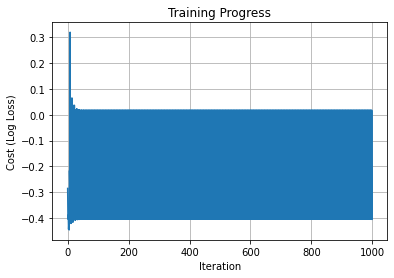

In [23]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log Loss)")
plt.title("Training Progress")
plt.grid(True)
plt.show()

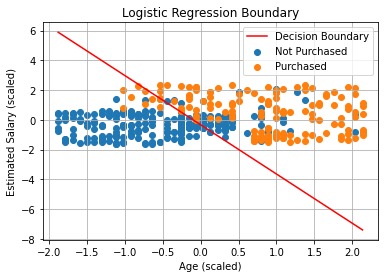

In [24]:
# Scatter actual data
plt.scatter(X_scaled[y==0][:,1], X_scaled[y==0][:,2], label='Not Purchased')
plt.scatter(X_scaled[y==1][:,1], X_scaled[y==1][:,2], label='Purchased')

# Calculate boundary (θ0 + θ1*x1 + θ2*x2 = 0)
x_vals = np.array([X_scaled[:,1].min(), X_scaled[:,1].max()])
y_vals = -(theta_final[0] + theta_final[1]*x_vals) / theta_final[2]

plt.plot(x_vals, y_vals, color='red', label='Decision Boundary')
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.legend()
plt.title("Logistic Regression Boundary")
plt.grid(True)
plt.show()


In [25]:
def predict(X, theta, threshold=0.5):
    return (sigmoid(X.dot(theta)) >= threshold).astype(int)

y_pred = predict(X_scaled, theta_final)
accuracy = np.mean(y_pred == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


Training Accuracy: 77.25%
